In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df.head(3)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


To find the species by using k_mean clustering. so we delete the species columns.

In [2]:
del df['species']

In [3]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [4]:
X = df.iloc[:,-2:] # features

In [5]:
X.head(2)

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2


In [6]:
no_of_cluster = range(1,5)


In [7]:
from sklearn.cluster import KMeans
sse = []
for k in no_of_cluster:
   model = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
   sse.append(model.inertia_)

Text(0, 0.5, 'SSE/inertia-')

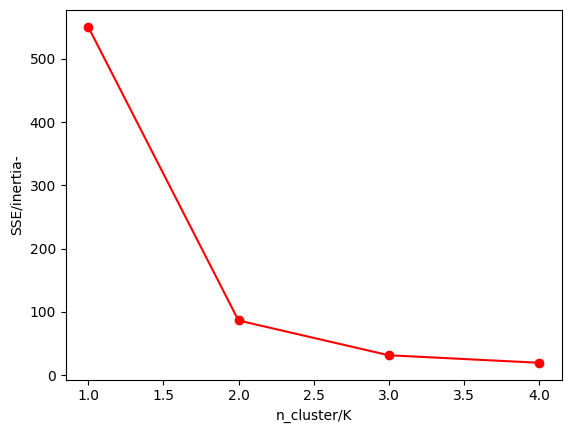

In [8]:
import matplotlib.pyplot as plt
plt.plot(no_of_cluster,sse,'o-',color='red')
plt.xlabel('n_cluster/K')
plt.ylabel('SSE/inertia-')

The fig show, the k values  is 3 by using elbow method.

 

In [9]:
K = 3
model = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(X)
clusters = model.predict(X)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# To find the centroid
centroid = model.cluster_centers_
centroid

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

* we use iloc only the Dataframe that's why we only use the X in iloc  not in centroid data because it is arrary.

<Axes: xlabel='petal_length', ylabel='petal_width'>

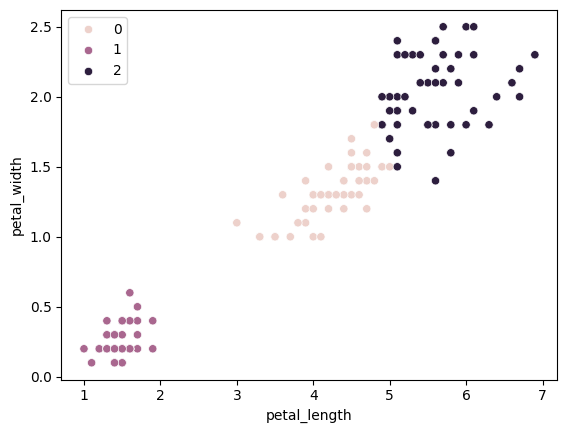

In [11]:
sns.scatterplot(x = X.iloc[:,0],y = X.iloc[:,1],hue = clusters)

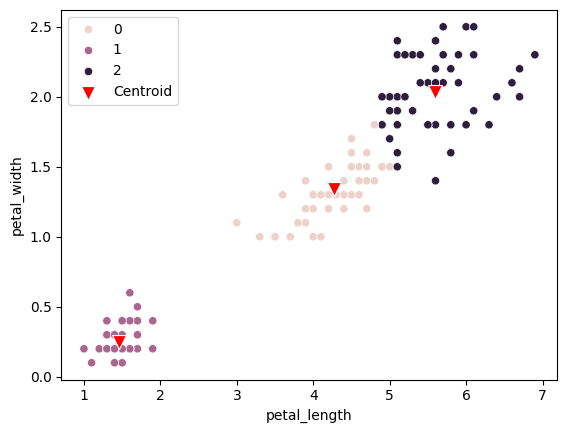

In [12]:
sns.scatterplot(x = X.iloc[:,0],y = X.iloc[:,1],hue = clusters)
sns.scatterplot(x= centroid[:,0],y=centroid[:,1],color = 'red',s = 100,label = 'Centroid',marker = 'v')
plt.legend()
plt.show()
